# Statistiques descriptives et prédictives, Corrélations & odds-ratio, Régression linéaire & Régression logistique

Nos données sont composées de plusieurs variables qui peuvent être numériques ou catégorielles. Pour une variable numérique, on peut considérer la distribution des individus selon cette variable. Pour une variable catégorielle, on peut considérer les effectifs de chaque catégorie. Mais le plus souvent, on s'intéressera à des relations entre variables, avec un variable à expliquer (*cible*) et un ou plusieurs variables explicatives.

Dans le cas d'une variable cible numérique, on s'intéresse principalement à l'influence d'une ou plusieurs autres variables numériques, sous la forme de **corrélation**. Le modèle correspondant sera celui de la **régression linéaire**, *univariée* ou *multivariée*. Pour prendre en compte l'influence de variables catégorielles, on pourra les recoder sous forme numérique.

Dans le cas d'une variable cible catégorielle, on s'intéressera à la *classification* des individus, chaque catégorie correspondant à une classe. On pourra s'intéresser aux rapports de chance [odd-ratio](https://fr.wikipedia.org/wiki/Odds_ratio) et l'on pourra se ramener aux cas de la régression par une transformation mathématique grâce à la fonction [logit](https://fr.wikipedia.org/wiki/Logit) pour passer des probabilités définies sur $[0,1]$ à une mesure (*evidence*) définie sur $\mathbb{R}$ avec une [régression logistique](https://fr.wikipedia.org/wiki/R%C3%A9gression_logistique). 
Si la variable catégorielle est ordinale, on
* de la façon dont la valeur à expliquer est conditionnée par une ou plusieurs variables catégorielles.


On peut toujours encoder les catégories sous la forme de [variables muettes](https://en.wikipedia.org/wiki/Dummy_variable_(statistics)) et `Pandas` a une méthode dédiée:

In [17]:
import pandas as pd
import seaborn as sns
tips = sns.load_dataset("tips")
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [10]:
tips_dummy=pd.get_dummies(tips)
tips_dummy

total_bill   tip  size  sex_Male  sex_Female  smoker_Yes  smoker_No  \
0         16.99  1.01     2         0           1           0          1   
1         10.34  1.66     3         1           0           0          1   
2         21.01  3.50     3         1           0           0          1   
3         23.68  3.31     2         1           0           0          1   
4         24.59  3.61     4         0           1           0          1   
..          ...   ...   ...       ...         ...         ...        ...   
239       29.03  5.92     3         1           0           0          1   
240       27.18  2.00     2         0           1           1          0   
241       22.67  2.00     2         1           0           1          0   
242       17.82  1.75     2         1           0           0          1   
243       18.78  3.00     2         0           1           0          1   

     day_Thur  day_Fri  day_Sat  day_Sun  time_Lunch  time_Dinner  
0           0        0        0        1           0            1  
1           0        0        0        1           0            1  
2           0        0        0        1           0            1  
3           0        0        0        1           0            1  
4           0        0        0        1           0            1  
..        ...      ...      ...      ...         ...          ...  
239         0        0        1        0           0            1  
240         0        0        1        0           0            1  
241         0        0        1        0           0            1  
242         0        0        1        0           0            1  
243         1        0        0        0           0            1  

[244 rows x 13 columns]

In [12]:
tips_dummy=pd.get_dummies(tips, drop_first=True)
tips_dummy

total_bill   tip  size  sex_Female  smoker_No  day_Fri  day_Sat  day_Sun  \
0         16.99  1.01     2           1          1        0        0        1   
1         10.34  1.66     3           0          1        0        0        1   
2         21.01  3.50     3           0          1        0        0        1   
3         23.68  3.31     2           0          1        0        0        1   
4         24.59  3.61     4           1          1        0        0        1   
..          ...   ...   ...         ...        ...      ...      ...      ...   
239       29.03  5.92     3           0          1        0        1        0   
240       27.18  2.00     2           1          0        0        1        0   
241       22.67  2.00     2           0          0        0        1        0   
242       17.82  1.75     2           0          1        0        1        0   
243       18.78  3.00     2           1          1        0        0        0   

     time_Dinner  
0              1  
1              1  
2              1  
3              1  
4              1  
..           ...  
239            1  
240            1  
241            1  
242            1  
243            1  

[244 rows x 9 columns]

In [ ]:
from statsmodels.formula.api import ols
tips = sns.load_dataset("tips")

model = ols('tip ~ total_bill + C(sex) + C(day) + C(day) + size', data=tips)
fitted_model = model.fit()
fitted_model.summary()

In [13]:
data = pd.DataFrame({'q': ['old', 'new', 'new', 'ren']})
data['q'] = data['q'].astype('category')
data['q'] = data['q'].cat.reorder_categories(['old', 'ren', 'new'], ordered=True)
data['q'] = data['q'].cat.codes
print(data['q'])

0    0
1    2
2    2
3    1
Name: q, dtype: int8


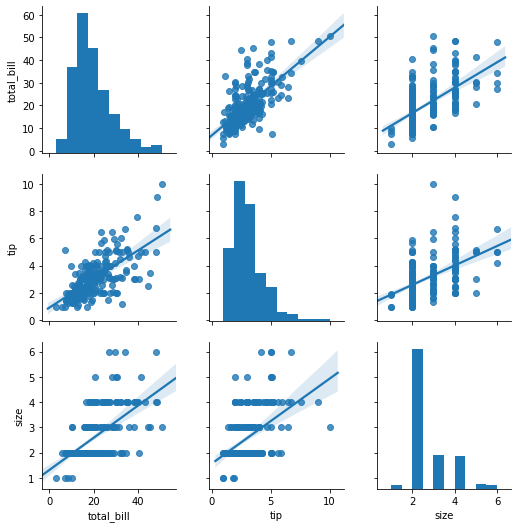

In [15]:
sns.pairplot(tips, kind="reg")

In [ ]:
clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


![fleur](http://idao.cirad.fr/content/adventoi/defs/fleur_fr.gif)

In [240]:
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

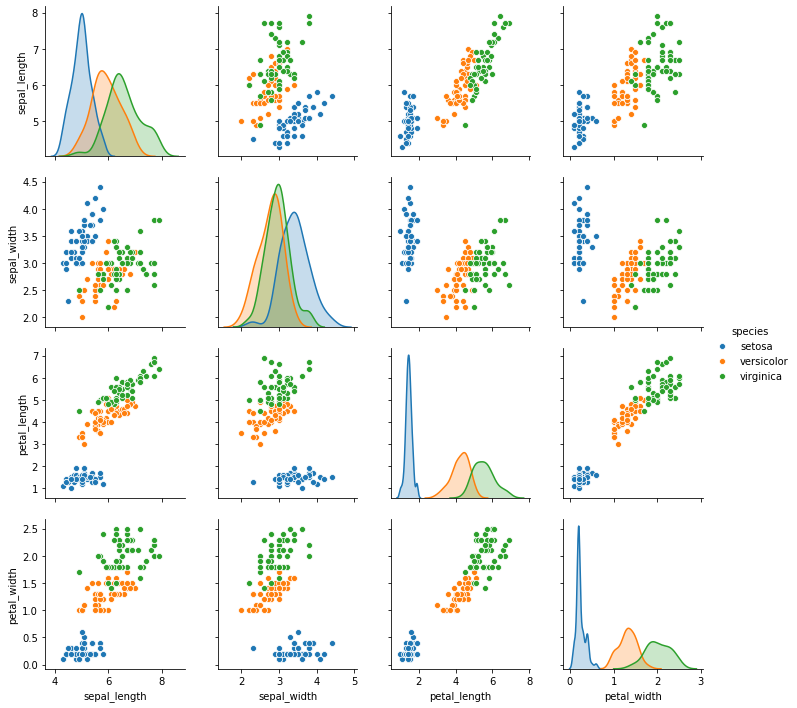

In [17]:
sns.pairplot(iris, hue="species");

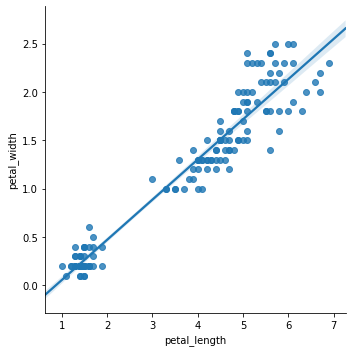

In [119]:
sns.lmplot(x="petal_length", y="petal_width", data=iris)

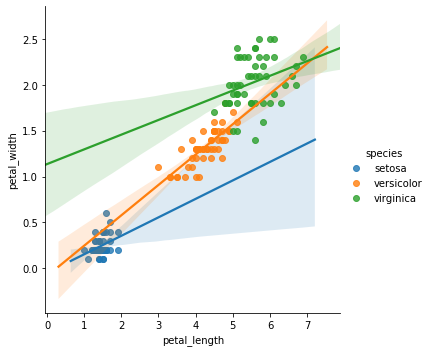

In [120]:
sns.lmplot(x="petal_length", y="petal_width", data=iris, hue='species')

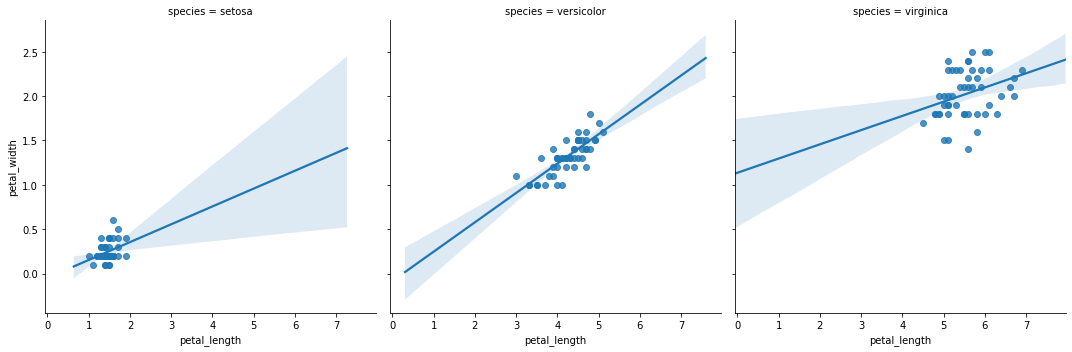

In [121]:
sns.lmplot(x="petal_length", y="petal_width", data=iris, col='species')

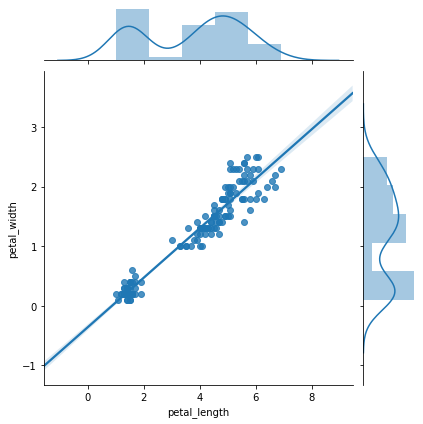

In [27]:
sns.jointplot(x='petal_length', y='petal_width', data=iris, kind='reg')

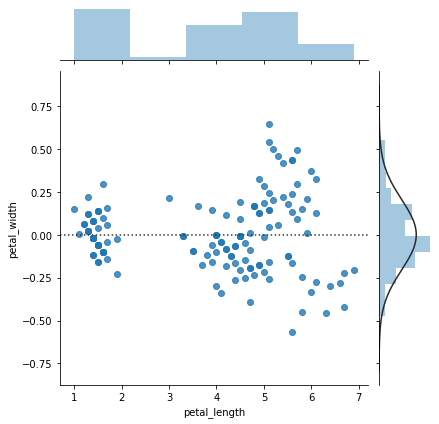

In [28]:
sns.jointplot(x='petal_length', y='petal_width', data=iris, kind='resid')

/home/bernard/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



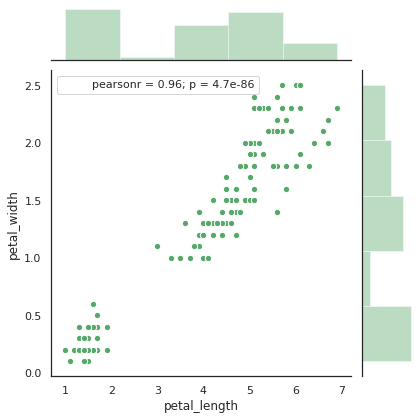

In [241]:
from scipy import stats
import matplotlib.pyplot as plt
g = sns.JointGrid(x="petal_length", y="petal_width", data=iris)
g = g.plot_joint(plt.scatter, color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
g = g.annotate(stats.pearsonr)

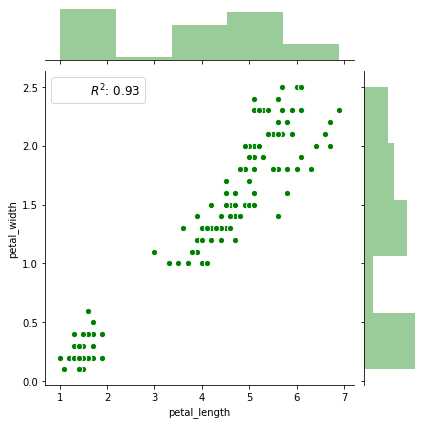

In [34]:
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = sns.JointGrid(x="petal_length", y="petal_width", data=iris)
g = g.plot_joint(plt.scatter, color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
g = g.annotate(rsquare, template="{stat}: {val:.2f}", stat="$R^2$", loc="upper left", fontsize=12)

In [112]:
anscombe = sns.load_dataset("anscombe")

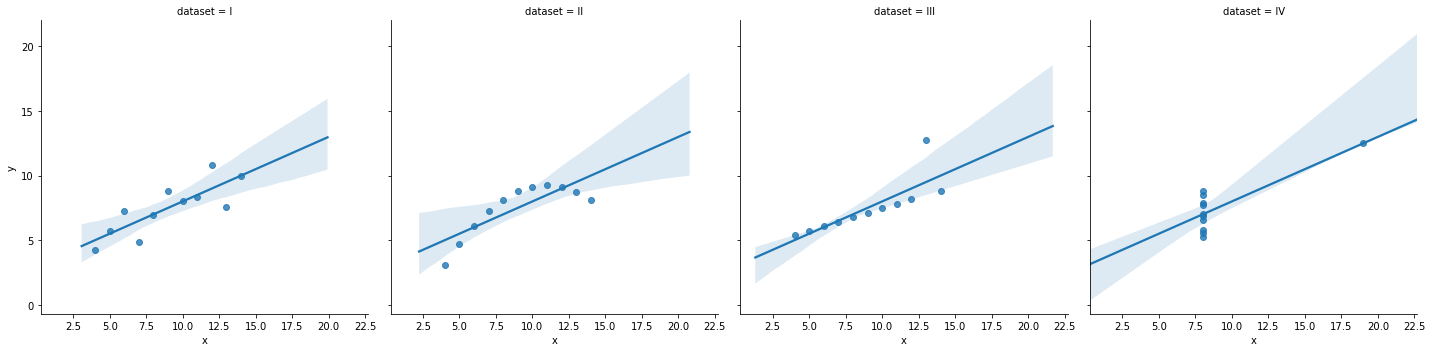

In [131]:
sns.lmplot(x="x", y="y", data=anscombe, col='dataset')

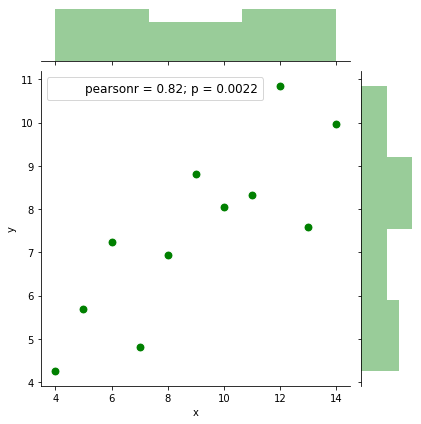

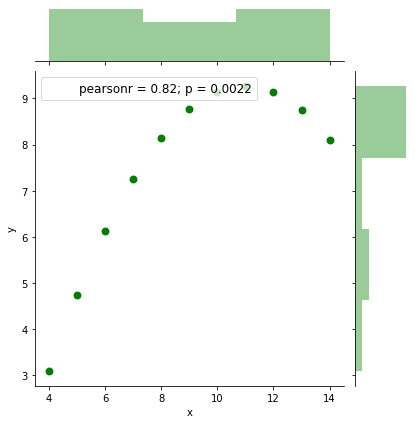

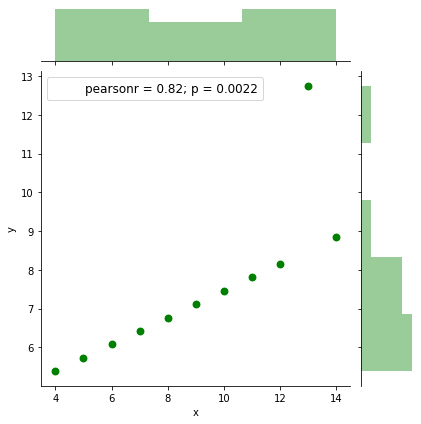

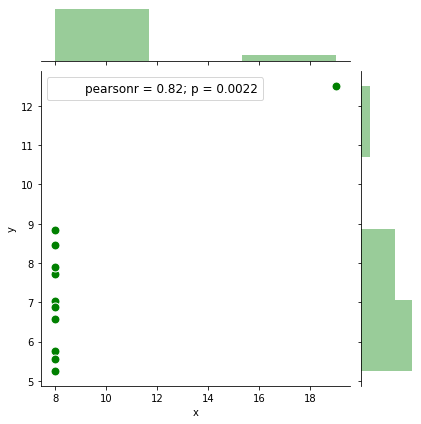

In [138]:
def plot_anscombe(i):
    i_n=['I','II','III','IV']
    g = sns.JointGrid(x="x", y="y", data=anscombe.query("dataset == '%s'"%i_n[i]))
    g = g.plot_joint(plt.scatter, color="g", s=80, edgecolor="white")
    g = g.plot_marginals(sns.distplot, kde=False, color="g")
    return g.annotate(stats.pearsonr, loc="upper left", fontsize=12)
for i in range(4):
    plot_anscombe(i)

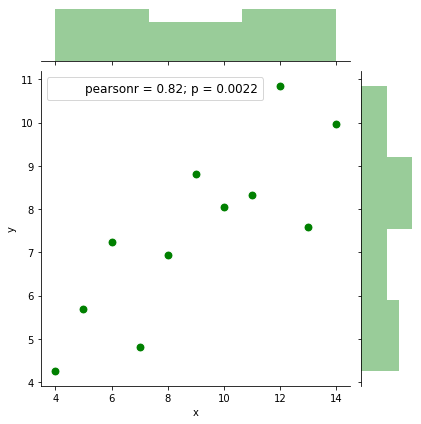

In [135]:
g = sns.JointGrid(x="x", y="y", data=anscombe.query("dataset == 'I'"))
g = g.plot_joint(plt.scatter, color="g", s=80, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
g = g.annotate(stats.pearsonr, loc="upper left", fontsize=12)

In [41]:
from sklearn import linear_model
model = linear_model.LinearRegression()
results = model.fit(iris[['petal_length']], iris['petal_width'])
print("La meilleure approximation linéaire est petal_width= %f + %f×petal_length" %(results.intercept_, results.coef_))

La meilleure approximation linéaire est petal_width= -0.363076 + 0.415755×petal_length


In [43]:
import statsmodels.api as sm
model = sm.OLS(iris['petal_width'],iris[['petal_length']])# L'ordre des arguments est l'inverse de celui de sklearn.linear_model !
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            petal_width   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              4417.
Date:                Sun, 29 Dec 2019   Prob (F-statistic):                   1.22e-112
Time:                        21:21:52   Log-Likelihood:                         -8.7179
No. Observations:                 150   AIC:                                      19.44
Df Residuals:                     149   BIC:                                      22.45
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Le coefficient n'est pas le même que celui de `sklearn.linear_model`.

In [78]:
model = sm.OLS(iris['petal_width'],sm.add_constant(iris['petal_length'], prepend=False))# L'ordre des arguments est l'inverse de celui de sklearn.linear_model !
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Sun, 29 Dec 2019   Prob (F-statistic):           4.68e-86
Time:                        22:51:17   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
petal_length     0.4158      0.010     43.387   

/home/bernard/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


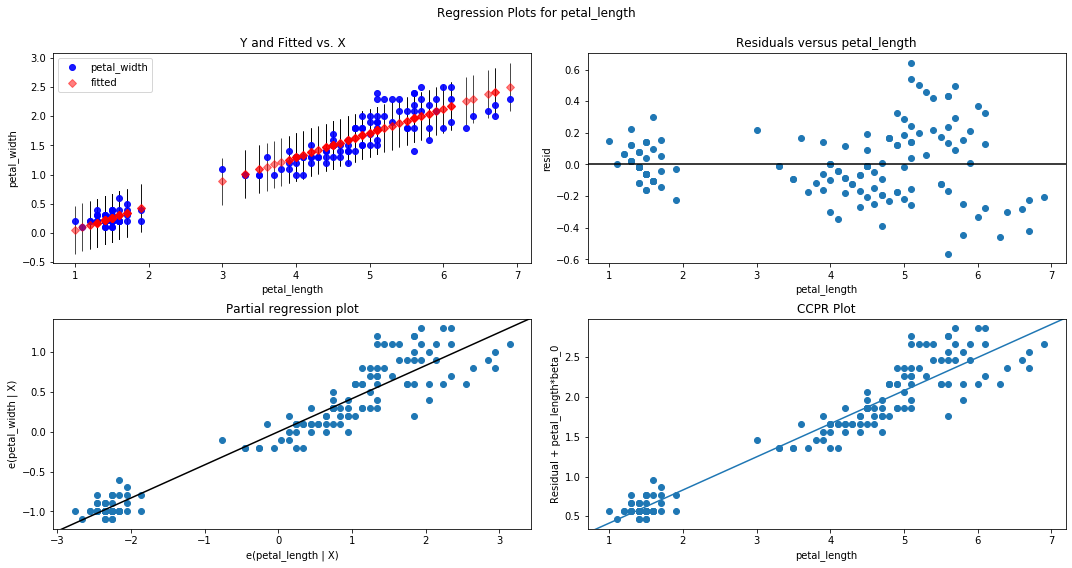

In [85]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results, "petal_length", fig=fig)

In [244]:
dummies = pd.get_dummies(iris["species"],drop_first=False)# Test with True
iris = pd.concat([iris, dummies], axis=1)
iris.head()

sepal_length  sepal_width  petal_length  petal_width species  setosa  \
0           5.1          3.5           1.4          0.2  setosa       1   
1           4.9          3.0           1.4          0.2  setosa       1   
2           4.7          3.2           1.3          0.2  setosa       1   
3           4.6          3.1           1.5          0.2  setosa       1   
4           5.0          3.6           1.4          0.2  setosa       1   

   versicolor  virginica  
0           0          0  
1           0          0  
2           0          0  
3           0          0  
4           0          0

In [60]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species  setosa  \
0           5.1          3.5           1.4          0.2  setosa       1   
1           4.9          3.0           1.4          0.2  setosa       1   
2           4.7          3.2           1.3          0.2  setosa       1   
3           4.6          3.1           1.5          0.2  setosa       1   
4           5.0          3.6           1.4          0.2  setosa       1   

   versicolor  virginica  
0           0          0  
1           0          0  
2           0          0  
3           0          0  
4           0          0

In [87]:
model = linear_model.LinearRegression()
results = model.fit(iris[['petal_length', "setosa", "versicolor", "virginica"]], iris['petal_width'])
print(results.intercept_, results.coef_)

0.33352975836253707 [ 0.23038946 -0.42435914  0.01101116  0.41334798]


In [66]:
model = linear_model.LinearRegression()
results = model.fit(iris[['petal_length', "setosa", "versicolor"]], iris['petal_width'])
print(results.intercept_, results.coef_)

0.7468777412884873 [ 0.23038946 -0.83770713 -0.40233682]


In [90]:
X = sm.add_constant(iris[["petal_length", "setosa", "versicolor", "virginica"]])
y = iris["petal_width"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     845.5
Date:                Sun, 29 Dec 2019   Prob (F-statistic):           4.88e-92
Time:                        22:54:28   Log-Likelihood:                 46.704
No. Observations:                 150   AIC:                            -85.41
Df Residuals:                     146   BIC:                            -73.37
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2501      0.098      2.561   

/home/bernard/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


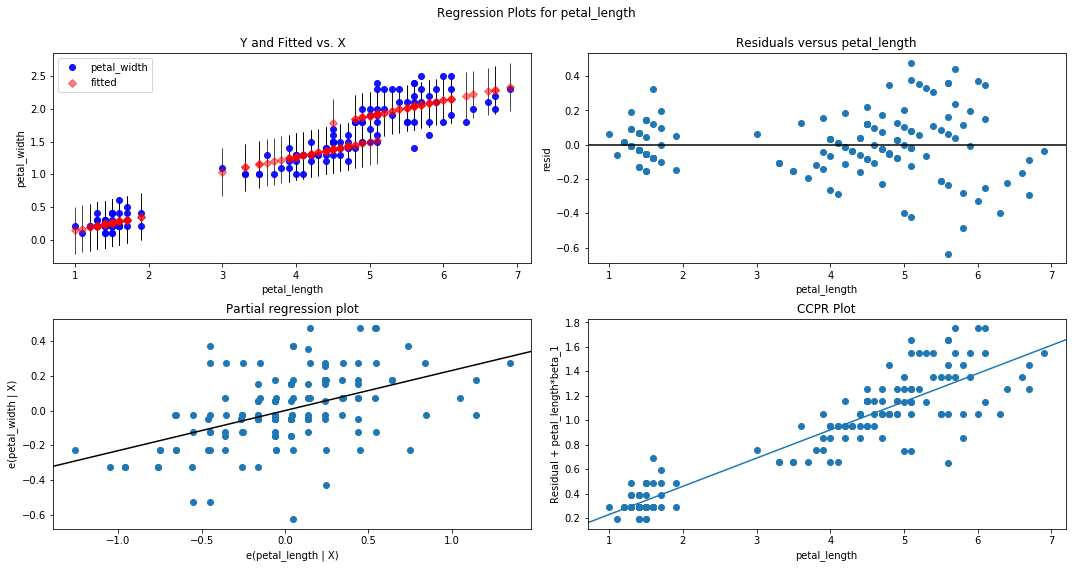

In [91]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results, "petal_length", fig=fig)

In [230]:
X = sm.add_constant(iris[["petal_length", "versicolor","virginica"]])
y = iris["petal_width"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     845.5
Date:                Mon, 30 Dec 2019   Prob (F-statistic):           4.88e-92
Time:                        17:30:53   Log-Likelihood:                 46.704
No. Observations:                 150   AIC:                            -85.41
Df Residuals:                     146   BIC:                            -73.37
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0908      0.056     -1.611   

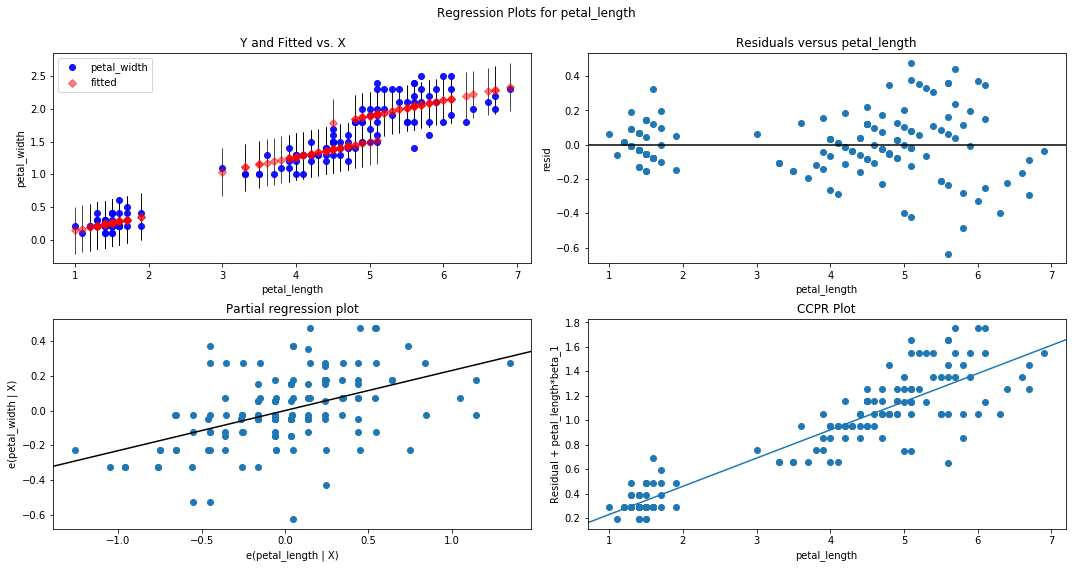

In [231]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results, "petal_length", fig=fig)

In [233]:
X = sm.add_constant(iris[["petal_length", "versicolor","virginica"]])
y = iris["petal_width"]

model = sm.RLM(y, X)
results = model.fit()
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:            petal_width   No. Observations:                  150
Model:                            RLM   Df Residuals:                      146
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 30 Dec 2019                                         
Time:                        17:31:24                                         
No. Iterations:                    28                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1125      0.049     -2.273   

In [234]:
results.params

const          -0.112457
petal_length    0.242871
versicolor      0.404576
virginica       0.792748
dtype: float64

Estimated coefficients (true, linear regression, RANSAC, statsmodels.Robust):
82.1903908407869 [54.17236387] [82.08533159] 79.06318871394183


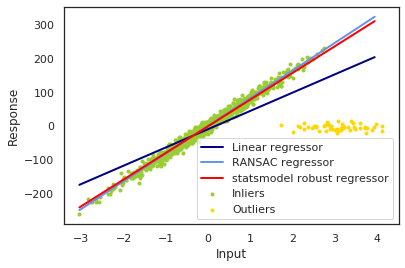

In [238]:
import numpy as np
import sklearn.linear_model
import statsmodels.api as sm
from sklearn import datasets


n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
lr = sklearn.linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

sm_model = sm.RLM(y, sm.add_constant(X))
sm_results = sm_model.fit()

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)
line_y_sm = sm_results.predict(sm.add_constant(line_X))
# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC, statsmodels.Robust):")
print(coef, lr.coef_, ransac.estimator_.coef_, sm_results.params[1])

lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')
plt.plot(line_X, line_y_sm, color='red', linewidth=lw,
         label='statsmodel robust regressor')

plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

In [246]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'setosa', 'versicolor', 'virginica'],
      dtype='object')

La gestion de variables catégorielles et du facteur constant peuvent être automatisés avec le module `statsmodels.formula.api` en écrivant l'équation de régression sous la forme d'une chae de caractères.
Par exemple, le code suivant :
```py
dummies = pd.get_dummies(iris["species"],drop_first=False)
iris = pd.concat([iris, dummies], axis=1)
X = sm.add_constant(iris[["petal_length", "setosa", "versicolor"]])
y = iris["petal_width"]
results = sm.OLS(y, X).fit()
```
peut être remplacé par :

In [245]:
import statsmodels.formula.api as smf

results = smf.ols(formula = "petal_width ~ petal_length + C(species)", 
                 data=iris, missing='drop').fit()
results.summary()

/home/bernard/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            petal_width   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     845.5
Date:                Sun, 05 Jan 2020   Prob (F-statistic):           4.88e-92
Time:                        12:01:18   Log-Likelihood:                 46.704
No. Observations:                 150   AIC:                            -85.41
Df Residuals:                     146   BIC:                            -73.37
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.0908      0.056     -1.611      0.109      -0.202       0.021
C(species)[T.versicolor]     0.4354      0.103      4.234      0.000       0.232       0.639
C(species)[T.virginica]      0.8377      0.145      5.764      0.000       0.550       1.125
petal_length                 0.2304      0.034      6.691      0.000       0.162       0.298
==============================================================================
Omnibus:                        6.210   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                9.578
Skew:                          -0.110   Prob(JB):                      0.00832
Kurtosis:                       4.218   Cond. No.                         54.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Régression logistique


[https://www.kaggle.com/uciml/pima-indians-diabetes-database]

In [152]:
admissions = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
admissions.head()

admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4

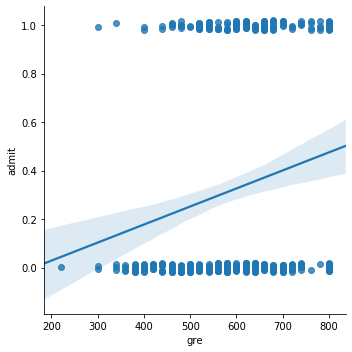

In [165]:
sns.lmplot(x="gre", y="admit", data=admissions,y_jitter=.02)

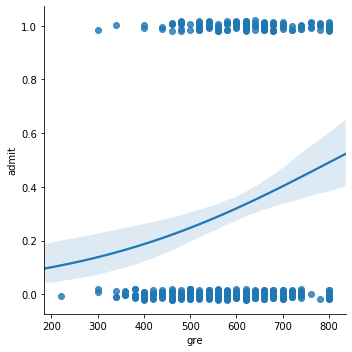

In [166]:
sns.lmplot(x="gre", y="admit", data=admissions,y_jitter=.02, logistic=True)

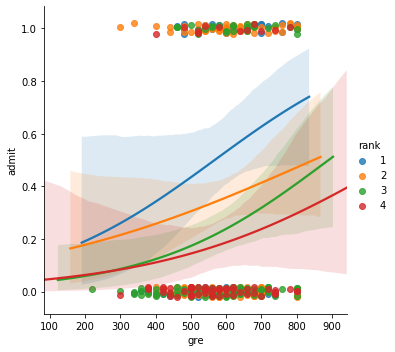

In [167]:
sns.lmplot(x="gre", y="admit", hue='rank', data=admissions,y_jitter=.02, logistic=True)

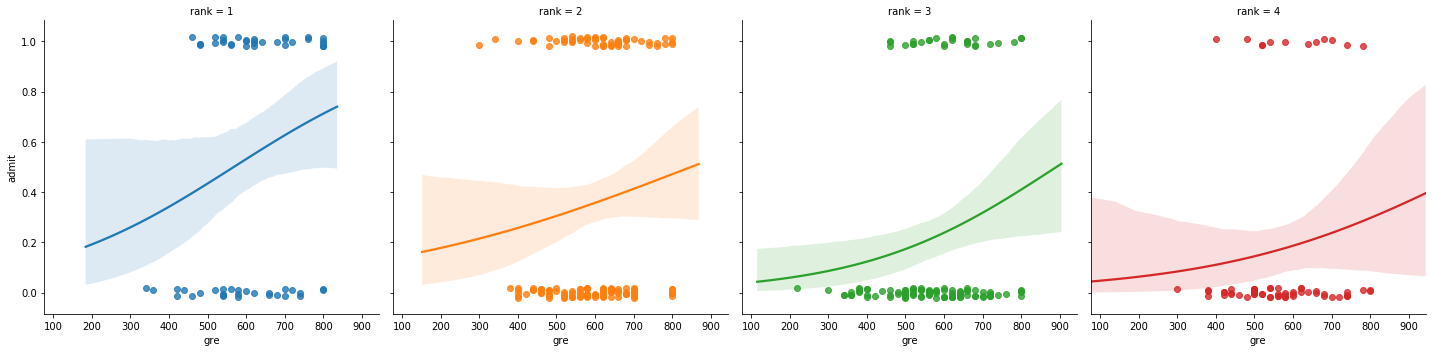

In [168]:
sns.lmplot(x="gre", y="admit", hue='rank', col='rank', data=admissions,y_jitter=.02, logistic=True)

In [181]:
X = admissions[['gre']] 
y = admissions['admit']

lr = LogisticRegression()
lr.fit(X, y)
lr.coef_

/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[0.00234884]])

In [183]:
from patsy import dmatrices
y, X = dmatrices('admit ~ gre + gpa + C(rank)', admissions, return_type = 'dataframe')
X.head()

Intercept  C(rank)[T.2]  C(rank)[T.3]  C(rank)[T.4]    gre   gpa
0        1.0           0.0           1.0           0.0  380.0  3.61
1        1.0           0.0           1.0           0.0  660.0  3.67
2        1.0           0.0           0.0           0.0  800.0  4.00
3        1.0           0.0           0.0           1.0  640.0  3.19
4        1.0           0.0           0.0           1.0  520.0  2.93

In [212]:
sk_lr = LogisticRegression(fit_intercept = False)
tmp=sk_lr.fit(X, y.values.ravel())
sk_lr.coef_

/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[-1.85817422e+00, -6.05262018e-01, -1.17928559e+00,
        -1.35680318e+00,  1.80406546e-03,  2.41301641e-01]])

In [ ]:
tmp.predict

In [217]:
tmp.score(X, y.values.ravel())

0.705

In [218]:
help(tmp.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model.logistic.LogisticRegression instance
    Returns the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True labels for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of self.predict(X) wrt. y.



In [220]:
sm_lr = sm.Logit(y, X)
sm_fit= sm_lr.fit()
sm_fit.params

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


Intercept      -3.989979
C(rank)[T.2]   -0.675443
C(rank)[T.3]   -1.340204
C(rank)[T.4]   -1.551464
gre             0.002264
gpa             0.804038
dtype: float64

[regularisation](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

In [221]:
sm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Mon, 30 Dec 2019   Pseudo R-squ.:                 0.08292
Time:                        11:51:46   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.9900      1.140     -3.500      0.000      -6.224      -1.756
C(rank)[T.2]    -0.6754      0.316     -2.134      0.033      -1.296      -0.055
C(rank)[T.3]    -1.3402      0.345     -3.881      0.000      -2.017      -0.663
C(rank)[T.4]    -1.5515      0.418     -3.713      0.000      -2.370      -0.733
gre              0.0023      0.001      2.070      0.038       0.000       0.004
gpa              0.8040      0.332      2.423      0.015       0.154       1.454
================================================================================
"""

In [223]:
mfx = sm_fit.get_margeff()
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:                  admit
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
C(rank)[T.2]    -0.1314      0.060     -2.184      0.029      -0.249      -0.013
C(rank)[T.3]    -0.2608      0.062     -4.176      0.000      -0.383      -0.138
C(rank)[T.4]    -0.3019      0.076     -3.956      0.000      -0.451      -0.152
gre              0.0004      0.000      2.107      0.035    3.07e-05       0.001
gpa              0.1564      0.063      2.485      0.013       0.033       0.280


[[254.  19.]
 [ 97.  30.]]


Text(0.5, 1, 'statsmodels')

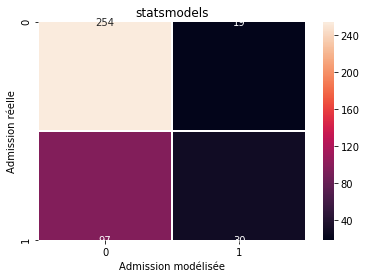

In [226]:
print(sm_fit.pred_table())
sns.heatmap(sm_fit.pred_table(),annot = True, linewidths=0.5,fmt=".0f")
plt.xlabel("Admission modélisée")
plt.ylabel("Admission réelle")
plt.title("statsmodels")

In [202]:
sk_lr = LogisticRegression(fit_intercept = False, C = 1e9)
sk_lr.fit(X, y.values.ravel())
sk_lr.coef_

/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[-3.97765654e+00, -6.74567838e-01, -1.33708167e+00,
        -1.55029740e+00,  2.25513644e-03,  8.01765502e-01]])

[[259  14]
 [104  23]]


Text(0.5, 1, 'statsmodels')

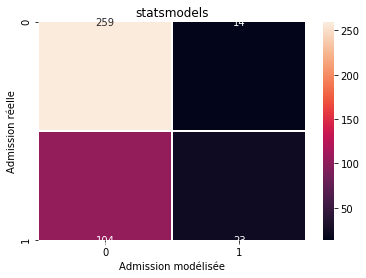

In [228]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y, sk_lr.predict(X))
print(conf_mat)
sns.heatmap(conf_mat,annot = True, linewidths=0.5,fmt=".0f")
plt.xlabel("Admission modélisée")
plt.ylabel("Admission réelle")
plt.title("scikit" if model is sk_lr else "statsmodels")

# De la description à la prévision

En fait, on est le plus souvent intéressé non pas par les données dont on dispose, mais :

 - par une *population* dont les données disponibles ne sont qu'un *échantillon*
 - par des données qui ne seront disponibles que dans le futur

Par ailleurs, on se donnera la possibilités d'utiliser des modèles de plus en plus *complexes* (cf. le degré de polynôme utilisé pour une régression).
On voudra donc non pas des modèles qui se contentent de représenter précisément les données disponibles, mais des modèles qui soient *généralisables* à de nouvelles données.

En particulier, on voudra éviter le **surapprentissage** (over-fitting) qui amène à [apprendre trop précisément les données elles-mêmes plutôt que la structure générale sous-jacente](https://developers.google.com/machine-learning/crash-course/generalization/peril-of-overfitting?hl=fr):

L'évaluation devra donc se faire sur une jeu de données **test** sur lesquelles le modèle n'a pas appris. On devra donc séparer les données disponibles en :
 * un jeu d'apprentissage
 * un jeu de test

De plus, les modèles plus complexes que la simple régression linéaire d'ordre 1 introduisent la notion d'[hyperparamètres](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) qui correspondent aux choix de complexité du modèle, par exemple le degré du polynôme utilisé pour la régression.

Le choix des hyperparamètres pose le même problème de jeu de données utilisé pour l'évaluation : les hyperparamètres ne doivent évidemment pas être choisis en fonction du jeu de test, mais ils ne doivent pas non plus être choisis sur les mêmes données qui ont servi à apprendre les paramètres du modèle. Classiquement, on a donc distingué :

1. jeu d'apprentissage : pour apprendre / optimiser les paramètre du modèle
2. jeu de validation : pour choisir les hyperparamètres du modèle
3. jeu de test : pour l'évaluation finale

En pratique, on voudra avoir un jeu de test qui fera environ 20% des données, et il peut être gênant de retirer encore 20% des donnéesrestantes du jeu d'apprentissage pour la validation. Si l'on a assez de ressources de calcul disponibles, on peut alors utiliser la technique de [validation croisée](https://fr.wikipedia.org/wiki/Validation_crois%C3%A9e) [disponible avec scikit-learn](https://scikit-learn.org/stable/modules/cross_validation.html) qui multiplie les validations mais avec des jeux de validations bien plus réduits à chaque fois (jusqu'à un seul pour le [Leave One Out](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#Leave-one-out_cross-validation).



## Évaluations

Pour les tâches de prévision numérique, on veut éviter aussi bien les erreurs par sur-estimation que par sous-estimations et l'on pourra utiliser la [moyenne des erreurs quadratiques](https://fr.wikipedia.org/wiki/Erreur_quadratique_moyenne), le carré plutôt que la valeur absolue ayant l'avantage d'être dérivable, ce qui peut être utile lorsqu'on cherche à minimiser ce critère, même si l'[erreur ansolue moyenne](https://en.wikipedia.org/wiki/Mean_absolute_error) est aussi utilisée lorsqu'on ne veut pas sur-pondérer les erreurs les plus importantes.

Pour les tâches de prévision catégorielle, on a plus souvent des erreurs de coût asymétrique. Par exemple pour la prévision de l'apparition ou non d'un cancer, on préfèrera un *faux positif* (erreur de type I) qui déclenchera un examen supplémentaire inutile à un *faux négatif* (erreur de type II) qui laissera le cancer se développer sans traitement. Bien sûr, tout est question de pondération car il serait à la fois trivial et inutile d'éviter absolument toute erreur de type I ou toute erreur de type II. 

[Sensibilité et spécificité](https://fr.wikipedia.org/wiki/Sensibilit%C3%A9_et_sp%C3%A9cificit%C3%A9) : On appelle **sensibilité** (*sensitivity*) le taux de vrais positifs et **spécificité** (*specificity*) le taux de vrais négatifs (le taux de faux positifs est donc 1-spécificité). 


* Accuracy : (TP +TN) / (TP + TN + FP +FN)
* Precision : TP / (TP + FP)
* Recall : TP / (TP + FN)
* [F1 score](https://en.wikipedia.org/wiki/F1_score) : 2 x ((Precision x Recall) / (Precision + Recall))


Pour une classification donnée, on peut regarder la matrice de confusion, mais pour regarder l'évolution de la performance en fonction d'un paramètre, on a recours à la [courbe ROC](https://fr.wikipedia.org/wiki/Courbe_ROC) qui montre l'évolution du taux de vrais positifs en fonction du taux de faux positifs :
![roc](https://upload.wikimedia.org/wikipedia/commons/6/6b/Roccurves.png)


On peut comparer deux modèles de classification en comparant les [aires sous la courbe ROC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve), cela permet de [résumer les performances indépendamment du compris sensibilité / spécificité](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=fr)


Courbe précision / rappel

## Algorithmes

Suivant que l'attribut à prévoir sera numérique ou catégoriel (symbolique), on parlera de *régression* ou de *classification*. On pourra toujours ramener de la classification à de la régression (cf. régression logistique), mais ce ne sera [pas forcément le plus efficace](https://dzone.com/articles/logistic-regression-vs-decision-tree). De même, on pourra toujours transformer des attributs symboliques en attributs numériques (cf. supra variables muettes), mais là encore ce ne sera pas forcément le plus pertinent. Par ailleurs, la performance des algorithmes dépendra non seulement de la nature (numérique ou symbolique) des attributs, mais aussi des caractéristiques du jeu de donnée lui-même (e.g. séparabilité):

<table><tr>
<td> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/VC1.svg/100px-VC1.svg.png" alt="sep1" /> </td>
<td> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b8/VC2.svg/100px-VC2.svg.png" alt="sep2" /> </td>
<td> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/VC3.svg/100px-VC3.svg.png" alt="sep3" /> </td>
</tr></table>

vs :


![non séparable](https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/VC4.svg/100px-VC4.svg.png)


## Arbres de décision

Un [arbre de décision](https://fr.wikipedia.org/wiki/Arbre_de_d%C3%A9cision_(apprentissage)) qui modélise l'apparition d'une forme de complication après une intervention chirurgicale à partir d'une certaine verterbre sur des patient d'un certain âge a la forme de la figure de gauche pour le jeu de données représenté à la figure de droite :
![decision tree](https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/Cart_tree_kyphosis.png/800px-Cart_tree_kyphosis.png)
On va utiliser [l'implémentation de scikit-learn](https://scikit-learn.org/stable/modules/tree.html)

In [7]:
%matplotlib inline

In [2]:
from sklearn import tree
X = [[0, 0], [1, 1], [0, 1],[1, 0]]
Y = [1, 1,0,0]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [3]:
clf.predict([[0., 0.5]])

array([1])

In [4]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

[Text(167.4, 181.2, 'X[0] <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(83.7, 108.72, 'X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(41.85, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(292.95, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

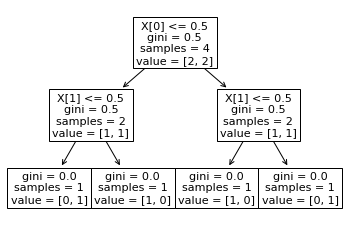

In [11]:
tree.plot_tree(clf)

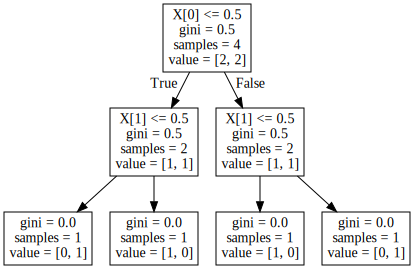

In [10]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

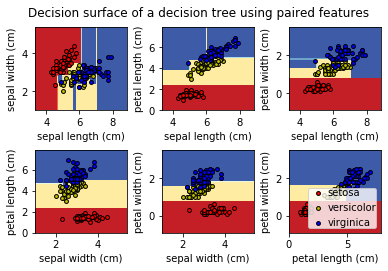

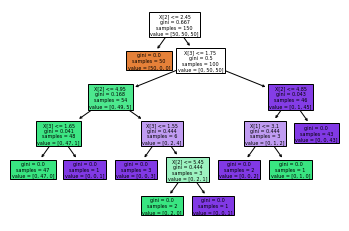

In [21]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Paramètres
n_classes = 3
plot_colors = "ryb" # classes coloriées en Rouge Jaune Bleu
plot_step = 0.02

iris = load_iris()

# il y a 4 caractéristique
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)

In [36]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = load_iris()
help(iris)

Help on Bunch in module sklearn.utils object:

class Bunch(builtins.dict)
 |  Bunch(**kwargs)
 |  
 |  Container object for datasets
 |  
 |  Dictionary-like object that exposes its keys as attributes.
 |  
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |  
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      Default dir() implementation.
 |  
 |  __getattr__(self, key)
 |  
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(self, key, value)
 |      Implement setattr(self, name, value).
 |  
 |  __setstate__(self, state)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__


In [37]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [38]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [39]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [40]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [41]:
# Paramètres
n_classes = 3
plot_colors = "ryb" # classes coloriées en Rouge Jaune Bleu
plot_step = 0.02

(0.0, 7.88, -0.9, 3.4800000000000044)

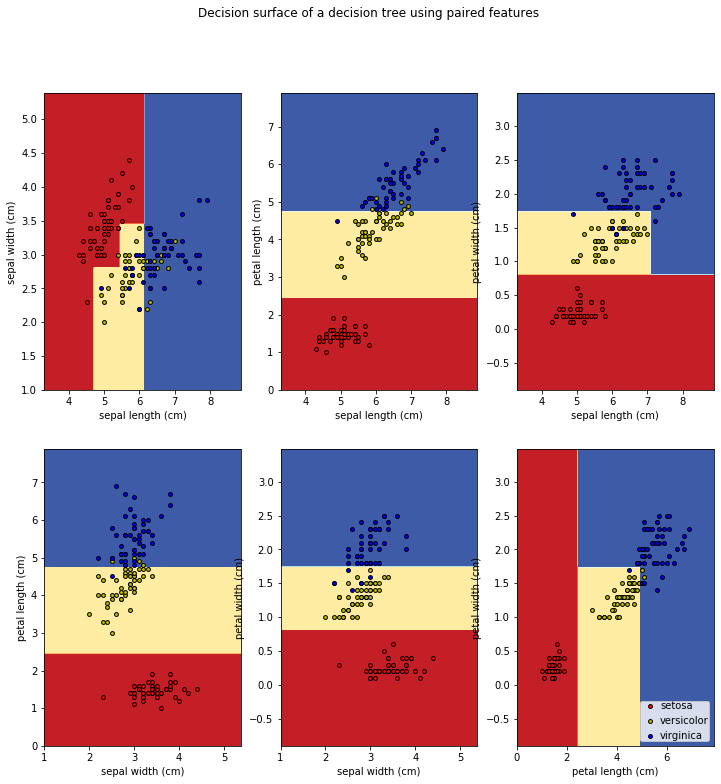

In [47]:
plt.figure(figsize=(12,12))

# il y a 4 caractéristiques, on considérer les combinaisons suivantes pour étudier et visualiser les découpage de l'espace en 2 dimensions
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier(max_depth=3).fit(X, y) # regarder l'influence de max_depth et min_samples_leaf

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

**Exercice :** Modifier le code ci-dessus pour visualiser l'impact des paramètres `min_samples_leaf` et `max_depth` du constructeur de `DecisionTreeClassifier`.

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.3)

depth = []
for i in range(1,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(x_train,y_train)
    depth.append((i,clf.score(x_test,y_test)))
print(depth)

[(1, 0.5111111111111111), (2, 0.9333333333333333), (3, 0.9555555555555556), (4, 0.9777777777777777), (5, 0.9555555555555556), (6, 0.9555555555555556), (7, 0.9555555555555556), (8, 0.9555555555555556), (9, 0.9555555555555556), (10, 0.9555555555555556), (11, 0.9555555555555556), (12, 0.9555555555555556), (13, 0.9555555555555556), (14, 0.9555555555555556), (15, 0.9555555555555556), (16, 0.9555555555555556), (17, 0.9555555555555556), (18, 0.9555555555555556), (19, 0.9555555555555556)]


In [55]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import cross_val_score
from pprint import pprint

depth = []
for i in range(1,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(estimator=clf, X=iris.data, y=iris.target, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(1, 0.6666666666666666), (2, 0.9336734693877551), (3, 0.9396258503401361), (4, 0.9464285714285714), (5, 0.9532312925170068), (6, 0.9464285714285714), (7, 0.9532312925170068), (8, 0.9464285714285714), (9, 0.9532312925170068), (10, 0.9464285714285714), (11, 0.9464285714285714), (12, 0.9532312925170068), (13, 0.9532312925170068), (14, 0.9532312925170068), (15, 0.9532312925170068), (16, 0.9532312925170068), (17, 0.9464285714285714), (18, 0.9464285714285714), (19, 0.9464285714285714)]


In [51]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV

X = iris.data
y = iris.target


parameters = {'max_depth':range(1,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=iris.data, y= iris.target)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9666666666666667 {'max_depth': 4}


/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [82]:
import pandas as pd
data = pd.read_csv('/home/bernard/Documents/Workspaces/Teaching/Data-Science/Data/Diabetes/diabetes.csv',header = 0)
print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [76]:
features=data.columns.to_numpy().tolist()[:-1]
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [77]:
data[features[1:]] = data[features[1:]].replace(0,np.NaN)

In [78]:
data['Outcome'].unique()

array([1, 0])

In [79]:
for var in features[:-1]:
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    print(temp)
    for outcome in data['Outcome'].unique():
        data.loc[(data['Outcome'] == outcome ) & (data[var].isnull()), var] = temp.loc[temp['Outcome']==outcome, var].iloc[0]
data.isnull().sum()

   Outcome  Pregnancies
0        0            2
1        1            4
   Outcome  Glucose
0        0    107.0
1        1    140.0
   Outcome  BloodPressure
0        0           70.0
1        1           74.5
   Outcome  SkinThickness
0        0           27.0
1        1           32.0
   Outcome  Insulin
0        0    102.5
1        1    169.5
   Outcome   BMI
0        0  30.1
1        1  34.3
   Outcome  DiabetesPedigreeFunction
0        0                     0.336
1        1                     0.449


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

[importance d'avoir des attributs normés](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py) (distribution centrée & réduite)

In [80]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
scaled = std.fit_transform(data[features])
scaled = pd.DataFrame(scaled,columns=features)

In [111]:
diabetes=scaled.merge(data['Outcome'],left_index=True,right_index=True)

In [113]:
diabetes

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.864625      -0.032180       0.665181  0.311604  0.169483   
1      -0.844885 -1.204727      -0.528124      -0.010112 -0.440843 -0.848549   
2       1.233880  2.014265      -0.693438       0.327535  0.311604 -1.328478   
3      -0.844885 -1.073339      -0.528124      -0.685405 -0.536303 -0.630399   
4      -1.141852  0.503310      -2.677212       0.665181  0.294758  1.551096   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.679177       0.298449       2.128317  0.429525  0.067679   
764    -0.547919  0.010607      -0.197495      -0.235210 -0.440843  0.634868   
765     0.342981 -0.022240      -0.032180      -0.685405 -0.334153 -0.906722   
766    -0.844885  0.141994      -1.024067       0.327535  0.311604 -0.339533   
767    -0.844885 -0.941952      -0.197495       0.214986 -0.440843 -0.295903   

     DiabetesPedigreeFunction       Age  Outcome  
0                    0.468492  1.425995        1  
1                   -0.365061 -0.190672        0  
2                    0.604397 -0.105584        1  
3                   -0.920763 -1.041549        0  
4                    5.484909 -0.020496        1  
..                        ...       ...      ...  
763                 -0.908682  2.532136        0  
764                 -0.398282 -0.531023        0  
765                 -0.685193 -0.275760        0  
766                 -0.371101  1.170732        1  
767                 -0.473785 -0.871374        0  

[768 rows x 9 columns]

In [114]:
X = diabetes.drop('Outcome',1)
y = diabetes['Outcome']

https://scikit-learn.org/stable/modules/model_evaluation.html

In [215]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
n_iter = 30
n_fold = 15
random_state = 42 # ou n'importe quoi, mais fixé pour que les résultats soient reproductibles
clf= DecisionTreeClassifier()
max_depths= range(1,35)
grid_search = GridSearchCV(
    estimator=clf,
    #param_distributions={'max_depth': max_depths}, 
    param_grid={'max_depth': max_depths},
    #n_iter=n_iter,
    scoring='precision',
    cv=n_fold,
    refit=True,
    #random_state=random_state,
    verbose=True
, n_jobs=-1)

In [216]:
grid_search.fit(X, y,)

Fitting 15 folds for each of 34 candidates, totalling 510 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 510 out of 510 | elapsed:    3.2s finished


GridSearchCV(cv=15, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 35)}, pre_dispatch='2*n_jobs',
 

In [217]:
scores = grid_search.cv_results_['mean_test_score']
print(scores)
scores_std = grid_search.cv_results_['std_test_score']
print(scores_std)

[0.71228283 0.79682747 0.79610242 0.81281858 0.8372086  0.83808719
 0.82812301 0.79983522 0.77454863 0.77329612 0.77031549 0.77611979
 0.77924599 0.7855472  0.7871889  0.77044138 0.77973206 0.76415234
 0.77767724 0.75775208 0.77182025 0.77664984 0.75501261 0.7739749
 0.77298616 0.76834267 0.76934377 0.76917932 0.76774593 0.77691815
 0.77369476 0.76541133 0.77168436 0.77020514]
[0.08857229 0.11231454 0.07602587 0.08448493 0.070283   0.07980763
 0.08105061 0.08792007 0.07596687 0.07362083 0.08960217 0.08053792
 0.09054139 0.0904747  0.09982012 0.07791287 0.07655424 0.08889609
 0.09976301 0.09768904 0.08507576 0.09432286 0.08432214 0.08466227
 0.09032746 0.07166931 0.07520179 0.07935388 0.08141537 0.08119752
 0.08594232 0.10467951 0.09014541 0.09010925]


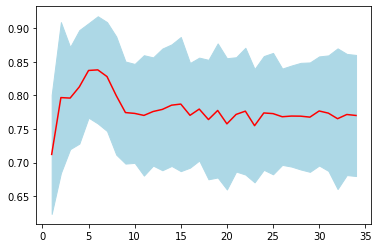

In [218]:
import seaborn as sns
sns.lineplot(x=max_depths, y=scores, color="red")
plt.fill_between(max_depths,scores-scores_std, scores+scores_std, color="lightblue")

In [171]:
opt_parameters =  grid_search.best_params_
clf = DecisionTreeClassifier(**opt_parameters)

In [172]:
opt_parameters

{'max_depth': 5}

In [173]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify
def model_performance(model, subtitle) :   
    #Kfold
    cv = KFold(n_splits=5,shuffle= True, random_state = 42)
    y_real = []
    y_proba = []
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    i = 1
    
    for train,test in cv.split(X,y):
        model.fit(X.iloc[train], y.iloc[train])
        pred_proba = model.predict_proba(X.iloc[test])
        precision, recall, _ = precision_recall_curve(y.iloc[test], pred_proba[:,1])
        y_real.append(y.iloc[test])
        y_proba.append(pred_proba[:,1])
        fpr, tpr, t = roc_curve(y[test], pred_proba[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc) 
    
    # Confusion matrix
    y_pred = cross_val_predict(model, X, y, cv=5)
    conf_matrix = confusion_matrix(y, y_pred)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)"],
                        y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)
    
    #Show metrics
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                    y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto', textfont=dict(color='black'),
                    orientation = 'h', opacity = 1, marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))

    #Roc curve
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)

    trace3 = go.Scatter(x=mean_fpr, y=mean_tpr,
                        name = "Roc : " ,
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))
    
    #Precision - recall curve
    y_real = y
    y_proba = np.concatenate(y_proba)
    precision, recall, _ = precision_recall_curve(y_real, y_proba)

    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')
    
    mean_auc=round(mean_auc,3)
    #Subplots
    fig = tls.make_subplots(rows=2, cols=2, print_grid=False,
                          specs=[[{}, {}], 
                                 [{}, {}]],
                          subplot_titles=('Confusion Matrix',
                                          'Metrics',
                                          'ROC curve'+" "+ '('+ str(mean_auc)+')',
                                          'Precision - Recall curve',
                                          ))
    #Trace and layout
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,1)
    fig.append_trace(trace4,2,1)
    fig.append_trace(trace5,2,2)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report (5 folds)</b><br>'+subtitle,
                        autosize = False, height = 830, width = 830,
                        plot_bgcolor = 'black',
                        paper_bgcolor = 'black',
                        margin = dict(b = 195), font=dict(color='white'))
    fig["layout"]["xaxis1"].update(color = 'white')
    fig["layout"]["yaxis1"].update(color = 'white')
    fig["layout"]["xaxis2"].update((dict(range=[0, 1], color = 'white')))
    fig["layout"]["yaxis2"].update(color = 'white')
    fig["layout"]["xaxis3"].update(dict(title = "false positive rate"), color = 'white')
    fig["layout"]["yaxis3"].update(dict(title = "true positive rate"),color = 'white')
    fig["layout"]["xaxis4"].update(dict(title = "recall"), range = [0,1.05],color = 'white')
    fig["layout"]["yaxis4"].update(dict(title = "precision"), range = [0,1.05],color = 'white')
    for i in fig['layout']['annotations']:
        i['font'] = titlefont=dict(color='white', size = 14)
    py.iplot(fig)


In [135]:
model_performance(clf, 'Arbre de décision')

/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/home/bernard/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [147]:
from sklearn.model_selection import  cross_val_score
def scores_table(model, subtitle, n_folds):
    scores = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    res = []
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = n_folds, scoring = sc)
        res.append(scores)
    df = pd.DataFrame(res).T
    df.loc['mean'] = df.mean()
    df.loc['std'] = df.std()
    df= df.rename(columns={0: 'accuracy', 1:'precision', 2:'recall',3:'f1',4:'roc_auc'})

    trace = go.Table(
        header=dict(values=['<b>Fold', '<b>Accuracy', '<b>Precision', '<b>Recall', '<b>F1 score', '<b>Roc auc'],
                    line = dict(color='#7D7F80'),
                    fill = dict(color='#a1c3d1'),
                    align = ['center'],
                    font = dict(size = 15)),
        cells=dict(values=[[str(i+1) for i in range(n_folds)]+['mean', 'std'],
                           np.round(df['accuracy'],3),
                           np.round(df['precision'],3),
                           np.round(df['recall'],3),
                           np.round(df['f1'],3),
                           np.round(df['roc_auc'],3)],
                   line = dict(color='#7D7F80'),
                   fill = dict(color='#EDFAFF'),
                   align = ['center'], font = dict(size = 15)))

    layout = dict(width=800, height=400, title = '<b>Cross Validation - {} folds</b><br>'.format(n_folds)+subtitle, font = dict(size = 15))
    fig = dict(data=[trace], layout=layout)

    py.iplot(fig, filename = 'styled_table')

In [148]:
scores_table(clf, 'Arbre de décision', 6)

In [175]:
from sklearn.ensemble import RandomForestClassifier
randForest = RandomForestClassifier(n_estimators=10, max_features = 2.2, min_samples_leaf = 3)
n_iter = 100
n_fold = 5
random_state = 42 # ou n'importe quoi, mais fixé pour que les résultats soient reproductibles
forest_clf= RandomForestClassifier()
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid

rf_search = RandomizedSearchCV(estimator = forest_clf, param_distributions = random_grid, n_iter = n_iter,scoring='precision', cv = n_fold, refit=True, verbose=2, random_state= random_state, n_jobs = -1)
rf_search.fit(X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [162]:
opt_parameters =  rf_search.best_params_
rf_clf = RandomForestClassifier(**opt_parameters)

In [163]:
model_performance(rf_clf, 'Random Forest')

/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/home/bernard/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [160]:
model_performance(rf_clf, 'Random Forest')

/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/home/bernard/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [174]:
scores_table(rf_clf, 'Random Forest', 6)

In [178]:
import xgboost as xgb
#gbm = xgb.XGBClassifier(
#    #learning_rate = 0.02,
# n_estimators= 2000,
# max_depth= 9,
# min_child_weight= 2,
 #gamma=1,
# gamma=0.4,
# subsample=0.8,
# colsample_bytree=0.8,
# objective= 'binary:logistic',
# nthread= -1,
# scale_pos_weight=1).fit(x_train, y_train)

xgb_clf = xgb.XGBClassifier()

param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

#fit_params = {'eval_metric': 'mlogloss',
#              'early_stopping_rounds': 10,
#              'eval_set': [(x_valid, y_valid)]}

xgb_search = RandomizedSearchCV(xgb_clf, param_grid, n_iter=n_iter,
                            n_jobs=-1, verbose=2, cv=n_fold,
                            #fit_params=fit_params,
                            scoring='precision', refit=True, random_state=random_state)
xgb_search.fit(X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'gamma': [0, 0.25, 0.5, 1.0],
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                          

In [179]:
opt_parameters =  xgb_search.best_params_
print(opt_parameters)
xgb_clf = xgb.XGBClassifier(**opt_parameters)

{'subsample': 0.8, 'silent': False, 'reg_lambda': 50.0, 'n_estimators': 100, 'min_child_weight': 3.0, 'max_depth': 20, 'learning_rate': 0.001, 'gamma': 0.5, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.8}


In [180]:
model_performance(xgb_clf, 'eXtreme Gradient Boosting')

/home/bernard/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [181]:
scores_table(xgb_clf, 'eXtreme GradientBoosting', 6)

In [182]:
xgb_clf = xgb.XGBClassifier()

param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

#fit_params = {'eval_metric': 'mlogloss',
#              'early_stopping_rounds': 10,
#              'eval_set': [(x_valid, y_valid)]}

xgb_search = RandomizedSearchCV(xgb_clf, param_grid, n_iter=n_iter,
                            n_jobs=-1, verbose=2, cv=n_fold,
                            #fit_params=fit_params,
                            scoring='accuracy', refit=True, random_state=random_state)
xgb_search.fit(X, y)
opt_parameters =  xgb_search.best_params_
print(opt_parameters)
xgb_clf = xgb.XGBClassifier(**opt_parameters)
model_performance(xgb_clf, 'eXtreme Gradient Boosting for accuracy')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.6s finished


{'subsample': 0.9, 'silent': False, 'reg_lambda': 0.1, 'n_estimators': 100, 'min_child_weight': 1.0, 'max_depth': 20, 'learning_rate': 0.2, 'gamma': 0.5, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.9}


/home/bernard/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [183]:

xgb_clf = xgb.XGBClassifier()

param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

#fit_params = {'eval_metric': 'mlogloss',
#              'early_stopping_rounds': 10,
#              'eval_set': [(x_valid, y_valid)]}

xgb_search = RandomizedSearchCV(xgb_clf, param_grid, n_iter=n_iter,
                            n_jobs=-1, verbose=2, cv=n_fold,
                            #fit_params=fit_params,
                            scoring='recall', refit=True, random_state=random_state)
xgb_search.fit(X, y)
opt_parameters =  xgb_search.best_params_
print(opt_parameters)
xgb_clf = xgb.XGBClassifier(**opt_parameters)
model_performance(xgb_clf, 'eXtreme Gradient Boosting for recall')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.8s finished


{'subsample': 0.6, 'silent': False, 'reg_lambda': 100.0, 'n_estimators': 100, 'min_child_weight': 7.0, 'max_depth': 20, 'learning_rate': 0.2, 'gamma': 0.25, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.5}


/home/bernard/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
from sklearn import datasets
d_X, d_y = datasets.load_diabetes(return_X_y=True)

# Pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))



In [185]:
from sklearn import datasets
d_X, d_y = datasets.load_diabetes(return_X_y=True)

In [196]:
tmp= datasets.load_diabetes()
tmp

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [195]:
np.isnan(d_X).count()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

Automatically created module for IPython interactive environment


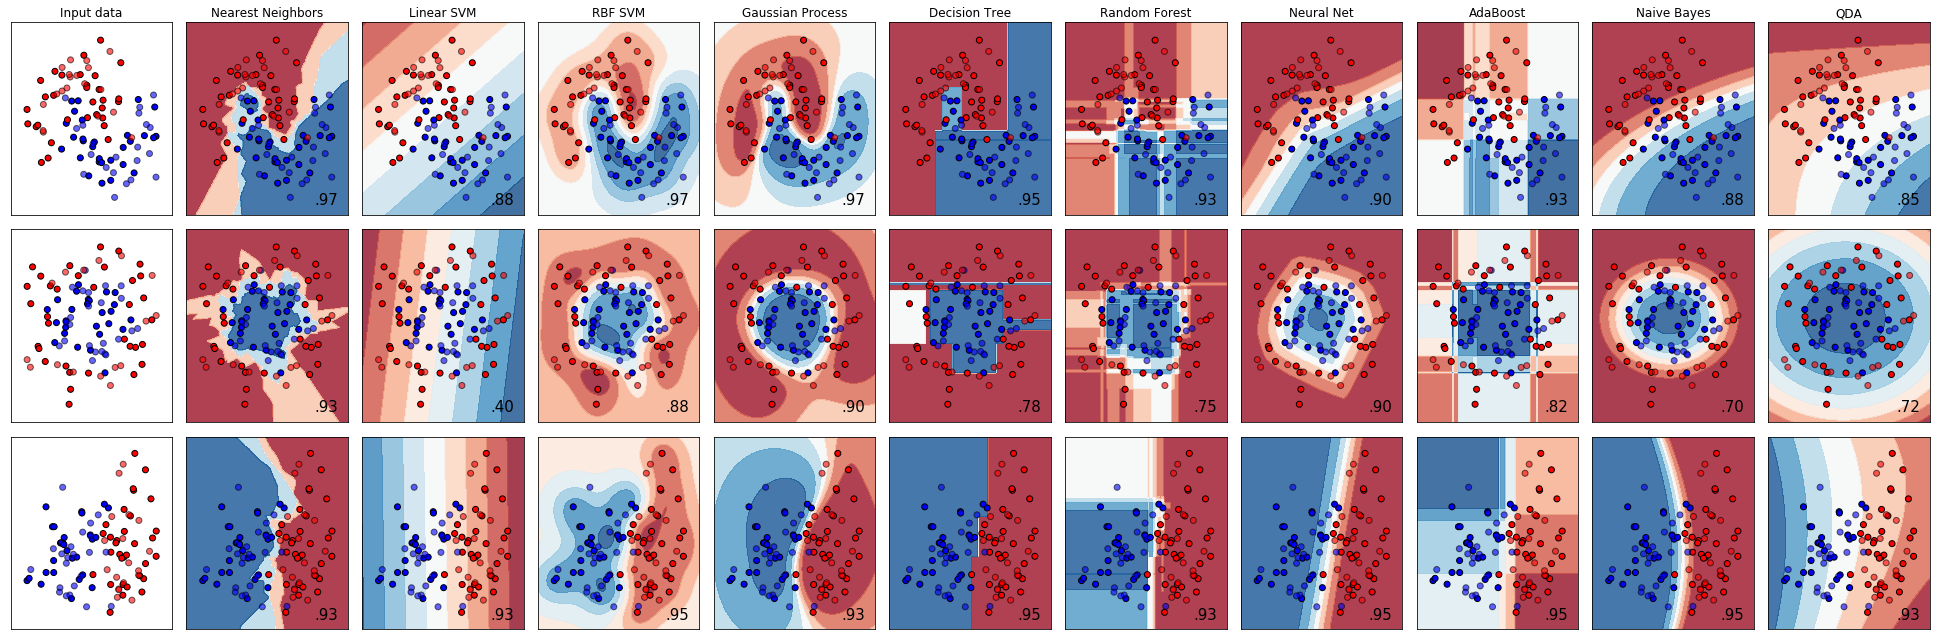

In [85]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

[(-5, 5), Text(0, 0.5, '$X_2$'), (-5, 5), Text(0.5, 0, '$X_1$'), None]

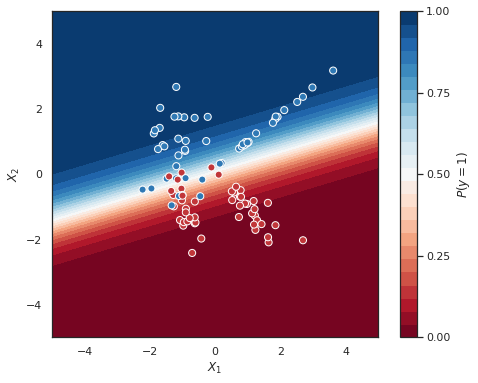

In [219]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
X, y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=15)
clf = LogisticRegression().fit(X[:100], y[:100])
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")


TypeError: Input z must be a 2D array.

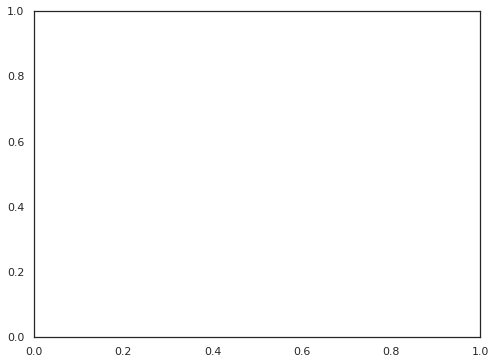

In [231]:
X[:,1]

array([ 2.2415954 ,  2.03167501, -0.56267987,  0.74772425, -0.07116333,
        0.22889525, -1.38969356,  0.24348206, -1.06901377,  1.13845077,
        2.50307376, -1.41078361, -0.97292241, -1.41512627,  1.76426405,
       -0.50966937,  0.84967736,  0.89012998,  1.7552087 ,  0.23135231,
       -1.50709041, -2.30858356, -0.82572392, -0.16906631,  1.87284598,
       -0.16783168, -0.95856315,  3.17510706, -0.12318412,  1.21940497,
        0.5742425 , -0.98724809, -0.66548013,  1.22766521, -0.90241783,
       -1.20274444,  2.51091472, -0.2525939 ,  1.57375991, -0.13768226,
       -0.65026097, -0.66071097, -0.12978908, -1.44854591,  1.38437071,
        2.37031722, -1.25353023,  0.20536491,  0.06712718, -1.03329525,
        1.01361575, -1.53219253, -0.60275371, -2.09174415, -0.8989542 ,
       -1.54746408, -1.07347961,  0.76739884,  0.46944492, -0.84065898,
        0.13379899,  1.34588783,  0.3204017 ,  0.93504851, -1.31700383,
       -1.40843063, -2.00449723, -0.51927119, -1.37329892,  2.33

In [224]:
X, y = make_classification(200, 3, 2, 0, weights=[.5, .5], random_state=15)
clf = LogisticRegression().fit(X[:100], y[:100])
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(X)[:, 1]
probs.shape

(200,)

In [225]:
help(ax.contour)

Help on method contour in module matplotlib.axes._axes:

contour(*args, data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Plot contours.
    
    Call signature::
    
        contour([X, Y,] Z, [levels], **kwargs)
    
    `.contour` and `.contourf` draw contour lines and filled contours,
    respectively.  Except as noted, function signatures and return values
    are the same for both versions.
    
    Parameters
    ----------
    X, Y : array-like, optional
        The coordinates of the values in *Z*.
    
        *X* and *Y* must both be 2-D with the same shape as *Z* (e.g.
        created via `numpy.meshgrid`), or they must both be 1-D such
        that ``len(X) == M`` is the number of columns in *Z* and
        ``len(Y) == N`` is the number of rows in *Z*.
    
        If not given, they are assumed to be integer indices, i.e.
        ``X = range(M)``, ``Y = range(N)``.
    
    Z : array-like(N, M)
        The height values over which the cont

In [ ]:
%matplotlib inline
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import tree, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5, forward=True)
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

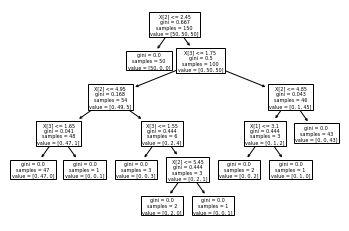

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression(fit_intercept = False)
mdl = model.fit(X, y)
model.coef_

/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-1.85817422e+00, -6.05262018e-01, -1.17928559e+00,
        -1.35680318e+00,  1.80406546e-03,  2.41301641e-01]])

In [144]:
titanic = sns.load_dataset("titanic")
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

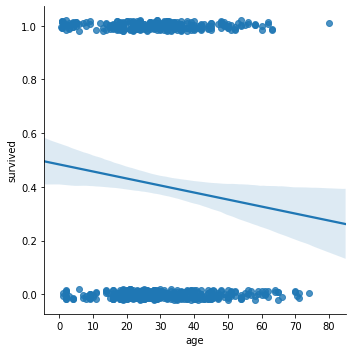

In [148]:
sns.lmplot(x="age", y="survived", data=titanic,y_jitter=.02)

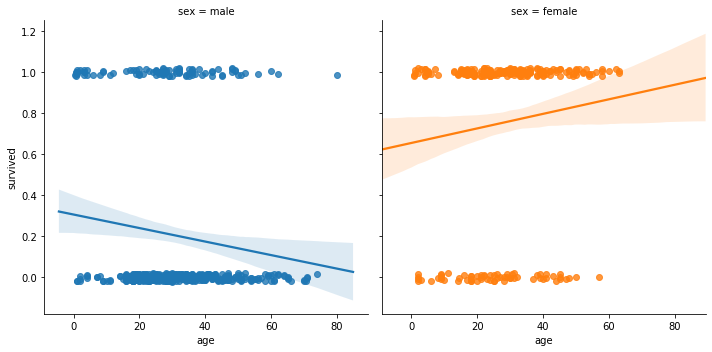

In [145]:
sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=titanic,y_jitter=.02)

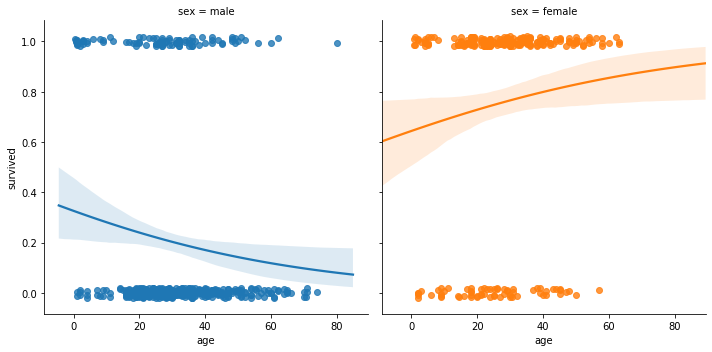

In [146]:
sns.lmplot(x="age", y="survived", col="sex", hue="sex", data= titanic, y_jitter=.02, logistic=True)

In [ ]:
# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")

# Show the survival proability as a function of age and sex
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))